In [55]:
from os.path import join
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imgaug

from ttt.constants import DATASETS

In [2]:
DATASET_NAME = "CIFAR-10-C"

In [5]:
dataset_raw_dir = join(DATASETS[DATASET_NAME], "raw")

In [25]:
all_variation_files = glob(join(dataset_raw_dir, "*.npy"))
all_variations = [basename(x).split(".npy")[0] for x in all_variation_files if 'labels.npy' not in x]

In [26]:
labels = np.load(join(dataset_raw_dir, "labels.npy"))

In [27]:
len(all_variations), len(labels)

(19, 50000)

In [29]:
all_data = dict()

for variation, file in tqdm(zip(all_variations, all_variation_files), desc="Loading variations"):
    all_data[variation] = np.load(file)

Loading variations: 19it [00:01, 13.19it/s]


In [30]:
all_data['fog'].shape

(50000, 32, 32, 3)

In [32]:
for variation in all_data:
    try:
        assert all_data[variation].shape == (50000, 32, 32, 3)
    except:
        print(variation)

motion_blur


In [33]:
all_data['motion_blur'].shape

(50000,)

In [34]:
all_data['motion_blur']

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [35]:
all_variations

['brightness',
 'contrast',
 'defocus_blur',
 'elastic_transform',
 'fog',
 'frost',
 'gaussian_blur',
 'gaussian_noise',
 'glass_blur',
 'impulse_noise',
 'jpeg_compression',
 'motion_blur',
 'pixelate',
 'saturate',
 'shot_noise',
 'snow',
 'spatter',
 'speckle_noise',
 'zoom_blur']

### Visualize samples

In [36]:
VARIATIONS_TO_SHOW = ["elastic_transform", "zoom_blur", "gaussian_blur", "defocus_blur", "contrast", "fog", "shot_noise", "snow", "fog", "frost"]

In [50]:
INDEX = 10

In [66]:
images = []
variations = []

for variation in VARIATIONS_TO_SHOW:
    images.append(cv2.resize(all_data[variation][INDEX], (224, 224)))
    variations.append(variation)

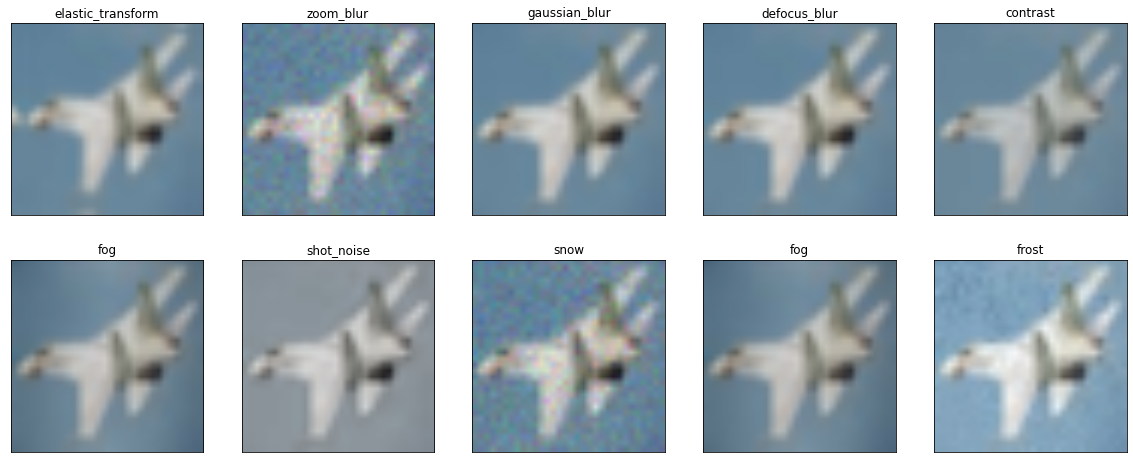

In [72]:
nrows, ncols = 2, 5
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 8))

for i in range(nrows):
    for j in range(ncols):
        index = j + i * ncols
        _ax = ax[i][j]
        
        _ax.set_xticks([])
        _ax.set_yticks([])
        _ax.imshow(images[index])
        _ax.set_title(variations[index])